## EDA NUEVA YORK

# Introducción

En este análisis exploratorio de datos (EDA), se analizarán las reseñas de Google Maps del estado de Nueva York para comprender mejor las opiniones y percepciones de los usuarios sobre los establecimientos turísticos y de ocio. Este estudio tiene como objetivo identificar las tendencias y patrones en las calificaciones y comentarios, así como destacar los aspectos más valorados por los clientes y las áreas que requieren mejoras.

In [1]:
#Importación de librerías
import ast
import json
import pandas as pd
import numpy as np
import jsonlines
import matplotlib as plt
import matplotlib.pyplot as plt
import os
import gc
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [2]:
#Carga de dataset
df = pd.read_parquet(r"E:\Repositorios y bases de datos\Henry DS\_PROYECTO FINAL\reviews_NY.parquet")

In [23]:
df

,user_id,name,time,rating,text,pics,resp,gmap_id,date,year_month
0,113722104692308235141,Alvin Martinez,1603494795361,5,I'm late to posting this but this store especi...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x89c25fc9494dce47:0x6d63c807b59a55,2020-10-23 23:13:15.361,2020-10
1,107293441492109320298,Johnnie Jackson,1620157037403,1,Very dissatisfied I did not get my phone the p...,None,{'text': 'We pride ourselves on providing an a...,0x89c25fc9494dce47:0x6d63c807b59a55,2021-05-04 19:37:17.403,2021-05
2,100378585801819400296,Manie Blazer,1597431662039,5,Excellent very well done with professional car...,None,None,0x89c25fc9494dce47:0x6d63c807b59a55,2020-08-14 19:01:02.039,2020-08
3,114998161153019826512,Fashion Fiinds,1543773862044,5,Basing my review strictly on the service I rec...,None,{'text': 'Thanks for the awesome review! We w...,0x89c25fc9494dce47:0x6d63c807b59a55,2018-12-02 18:04:22.044,2018-12
4,117178185728422297915,Andres Rieloff,1597279097718,1,Bad! Disorganized. I'm being totally honest. I...,None,None,0x89c25fc9494dce47:0x6d63c807b59a55,2020-08-13 00:38:17.718,2020-08
...,...,...,...,...,...,...,...,...,...,...
2699995,115088845698717434859,Gourav Saha,1555437628373,4,None,None,None,0x89de0b8a0905153d:0x976fc4a006084f03,2019-04-16 18:00:28.373,2019-04
2699996,111706397232791116806,jenn mosher,1462985945347,5,None,None,None,0x89de0b8a0905153d:0x976fc4a006084f03,2016-05-11 16:59:05.347,2016-05
2699997,108369784075976765619,Michele Huck,1573877341097,5,None,None,None,0x89de0b8a0905153d:0x976fc4a006084f03,2019-11-16 04:09:01.097,2019-11
2699998,100786787316351751498,Frank B,1603835563283,5,None,None,None,0x89de0b8a0905153d:0x976fc4a006084f03,2020-10-27 21:52:43.283,2020-10


# Nulos

In [3]:
df.isnull().sum()

user_id          0
name             0
time             0
rating           0
text       1163593
pics       2598344
resp       2436003
gmap_id          0
dtype: int64

In [4]:
print(df[df.isnull().any(axis=1)])


                       user_id              name           time  rating  \
0        113722104692308235141    Alvin Martinez  1603494795361       5   
1        107293441492109320298   Johnnie Jackson  1620157037403       1   
2        100378585801819400296      Manie Blazer  1597431662039       5   
3        114998161153019826512    Fashion Fiinds  1543773862044       5   
4        117178185728422297915    Andres Rieloff  1597279097718       1   
...                        ...               ...            ...     ...   
2699995  115088845698717434859       Gourav Saha  1555437628373       4   
2699996  111706397232791116806       jenn mosher  1462985945347       5   
2699997  108369784075976765619      Michele Huck  1573877341097       5   
2699998  100786787316351751498           Frank B  1603835563283       5   
2699999  104190915147086572085  Vincent Viscanti  1561768469200       5   

                                                      text  \
0        I'm late to posting this but

# Vacíos

In [5]:
def is_empty(x):
    if x is None:
        return True
    elif isinstance(x, (str, list, dict, set, np.ndarray)) and len(x) == 0:
        return True
    return False

# Aplicar la función al DataFrame
empty_mask = df.applymap(is_empty)

# Ver el número de valores vacíos en cada columna
print("\nValores vacíos por columna:")
print(empty_mask.sum())

# Ver las filas que contienen valores vacíos
print("\nFilas con valores vacíos:")
print(df[empty_mask.any(axis=1)])

C:\Users\Germán\AppData\Local\Temp\ipykernel_7164\1910015193.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  empty_mask = df.applymap(is_empty)



Valores vacíos por columna:
user_id          0
name             0
time             0
rating           0
text       1163593
pics       2598344
resp       2436003
gmap_id          0
dtype: int64

Filas con valores vacíos:
                       user_id              name           time  rating  \
0        113722104692308235141    Alvin Martinez  1603494795361       5   
1        107293441492109320298   Johnnie Jackson  1620157037403       1   
2        100378585801819400296      Manie Blazer  1597431662039       5   
3        114998161153019826512    Fashion Fiinds  1543773862044       5   
4        117178185728422297915    Andres Rieloff  1597279097718       1   
...                        ...               ...            ...     ...   
2699995  115088845698717434859       Gourav Saha  1555437628373       4   
2699996  111706397232791116806       jenn mosher  1462985945347       5   
2699997  108369784075976765619      Michele Huck  1573877341097       5   
2699998  10078678731635175149

# Tipos de datos

In [6]:
#Evaluamos con qué tipo de datos contamos. Nos interesa buscar especialmente cadenas de texto y números enteros
print(df.dtypes)

user_id    object
name       object
time        int64
rating      int64
text       object
pics       object
resp       object
gmap_id    object
dtype: object


# Metadatos

In [7]:
#Las siguientes celdas muestras información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700000 entries, 0 to 2699999
Data columns (total 8 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   user_id  object
 1   name     object
 2   time     int64 
 3   rating   int64 
 4   text     object
 5   pics     object
 6   resp     object
 7   gmap_id  object
dtypes: int64(2), object(6)
memory usage: 164.8+ MB


In [8]:
#imprimir las dimensiones del data frame
print(df.shape)

(2700000, 8)


In [9]:
#Visualización de los nombres de las columnas
print(df.columns)

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')


In [10]:
#Datos estadísticos
print(df.describe())     #Se procederá en el ETL a transformar la notación

               time        rating
count  2.700000e+06  2.700000e+06
mean   1.551331e+12  4.302915e+00
std    4.553183e+10  1.114816e+00
min    6.626016e+11  1.000000e+00
25%    1.524526e+12  4.000000e+00
50%    1.555273e+12  5.000000e+00
75%    1.580971e+12  5.000000e+00
max    1.631067e+12  5.000000e+00


In [11]:
#Muestra de valores únicos de ID de usuarios
unique_misc = df['user_id'].unique()
print(len(unique_misc))


567559


In [12]:
#Muestra de valores únicos de ID de locación
unique_misc = df['gmap_id'].unique()
print(len(unique_misc))

70444


# Duplicados

In [13]:
#Crear una lista para almacenar las columnas que causaron problemas
columnas_problema = []

def check_duplicates(dataframe):
    global columnas_problema
    
    # Crear una lista para almacenar las columnas que se pueden procesar
    columnas_procesables = []

    for col in dataframe.columns:
        try:
            # Intentar acceder a los datos de la columna
            df[columnas_procesables].append(col)
        except Exception as e:
            columnas_problema.append(col)
            

    # Crear un DataFrame solo con las columnas procesables
    df_procesable = dataframe[columnas_procesables]
    
    # Verificar duplicados en el DataFrame procesable
    try:
        duplicados = df_procesable.duplicated()
        num_duplicados = duplicados.sum()
        if num_duplicados > 0:
            print(f"Número de filas duplicadas en el DataFrame: {num_duplicados}")
            print("Filas duplicadas:")
            print(dataframe[duplicados])
        else:
            print("No hay filas duplicadas en el DataFrame.")
    except Exception as e:
        print(f"Error al verificar duplicados en el DataFrame procesable: {e}")

# Verificar duplicados en el DataFrame
check_duplicates(df)

# Listar las columnas problemáticas
if columnas_problema:
    print("Columnas que no pueden ser accedidas:")
    for col in columnas_problema:
        print(col)
        

No hay filas duplicadas en el DataFrame.
Columnas que no pueden ser accedidas:
user_id
name
time
rating
text
pics
resp
gmap_id


# Outliers

In [14]:
# Función para calcular outliers usando el rango intercuartílico (IQR)
def calculate_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Aplicar la función a la columna `rating`
rating_outliers = calculate_outliers_iqr(df['rating'])
print("Outliers en rating:")
print(rating_outliers)

Outliers en rating:
1          1
4          1
5          1
7          1
13         1
          ..
2699790    1
2699840    1
2699958    1
2699965    1
2699990    1
Name: rating, Length: 232785, dtype: int64


In [15]:
# Aplicar la función a la columna `time`
time_outliers = calculate_outliers_iqr(df['time'])
print("Outliers en time:")
print(time_outliers)


Outliers en time:
65         1424292905085
102        1303061635689
144        1409669580818
165        1384783434547
166        1424212048498
               ...      
2699775    1409572171101
2699806    1396995005176
2699929    1372621231103
2699963    1434574009456
2699973    1385593102826
Name: time, Length: 38579, dtype: int64


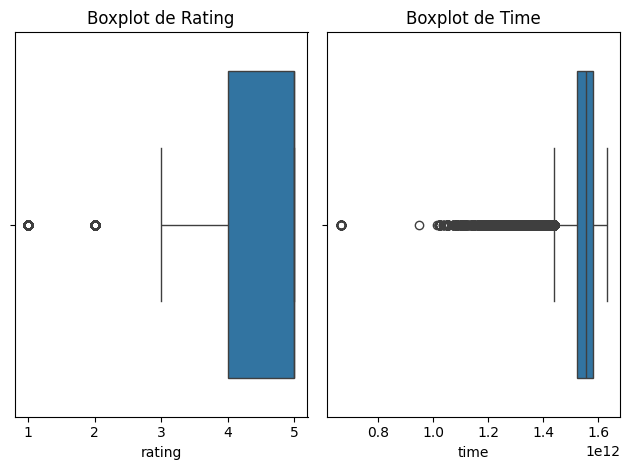

In [16]:
# Boxplot para la columna 'rating'
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='rating')
plt.title('Boxplot de Rating')

# Boxplot para la columna 'time'
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='time')
plt.title('Boxplot de Time')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Boxplot de Rating:
La mediana está cerca de 4.0.
La caja (que representa el 50% central de los datos) se extiende aproximadamente de 4.0 a 5.0.
El bigote inferior se extiende hasta cerca de 1.0.
Hay algunos valores atípicos en los ratings más bajos (1.0 y 2.0).
La distribución está sesgada hacia los ratings altos, con una concentración en el rango 4-5.

Boxplot de Time:
La mediana está alrededor de 1.4.
La caja es muy estrecha, lo que indica que el 50% central de los datos está muy concentrado.
Hay un largo bigote inferior que se extiende hasta aproximadamente 0.8.
Se observan varios valores atípicos en la parte inferior de la distribución.
La distribución del tiempo es muy asimétrica, con una cola larga hacia los valores más bajos.

Comparación:
El boxplot de Rating muestra una distribución más equilibrada (aunque sesgada hacia arriba) en comparación con el de Time.
El boxplot de Time sugiere que la mayoría de los valores están muy concentrados en un rango estrecho, con algunos casos que toman significativamente menos tiempo.

# Distribución del rating

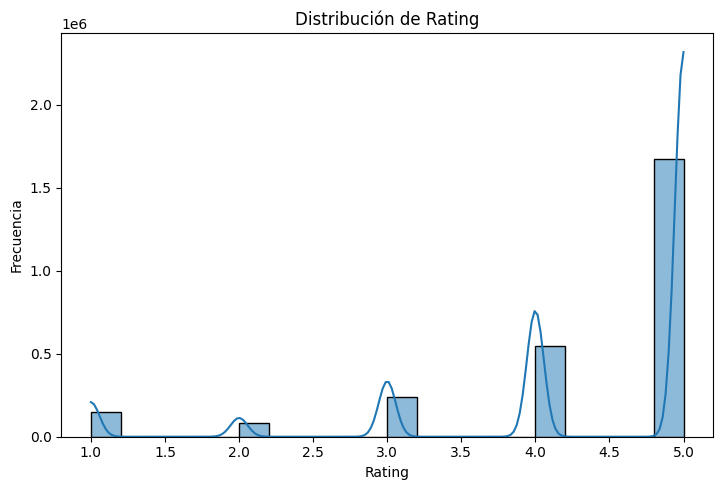

In [17]:
# Crear una figura con dos subgráficas
plt.figure(figsize=(14, 5))

# Histograma y gráfico de densidad para la columna 'rating'
plt.subplot(1, 2, 1)
sns.histplot(df['rating'], kde=True, bins=20)
plt.title('Distribución de Rating')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')


# Mostrar los gráficos
plt.tight_layout()
plt.show()


Esta distribución sugiere una fuerte preferencia de los usuarios por dar calificaciones de 5 estrellas, con una tendencia general hacia calificaciones altas. Esto podría indicar una alta satisfacción con el producto o servicio calificado, o posiblemente un sesgo en el sistema de calificación hacia puntuaciones más altas.

# Nube de palabras de reseñas

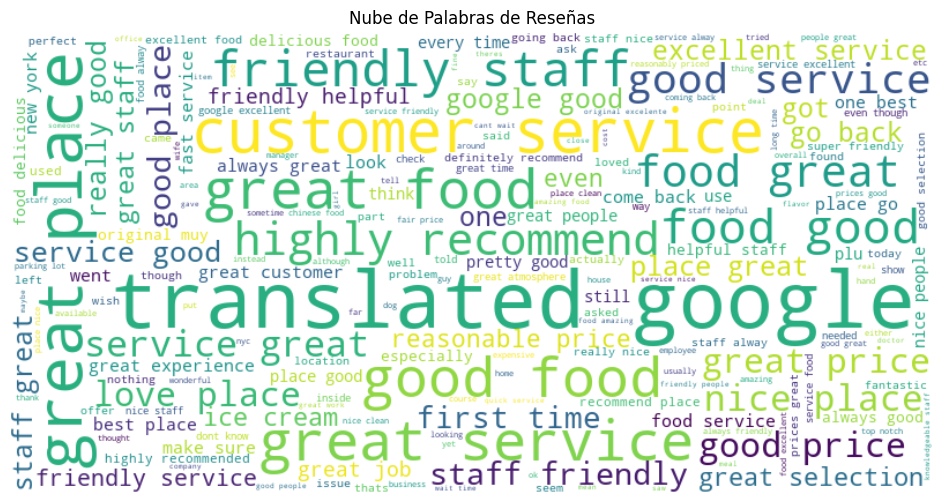

In [22]:
# Función para limpiar el texto
def clean_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = text.translate(str.maketrans('', '', string.punctuation))  # Eliminar puntuación
    words = word_tokenize(text)  # Tokenizar
    stop_words = set(stopwords.words('english'))  # Stopwords en inglés
    words = [word for word in words if word not in stop_words]  # Eliminar stopwords
    return ' '.join(words)

# Unir todas las reseñas en una sola cadena de texto
all_text = ' '.join(df['text'].dropna().apply(clean_text))

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar los ejes
plt.title('Nube de Palabras de Reseñas')
plt.show()

Palabras más prominentes:
"great" (grande, excelente): Destaca significativamente en varios tamaños y colores.
"food" (comida): Muy visible, sugiriendo que las reseñas se centran en establecimientos de comida.
"service" (servicio): Altamente destacada, indicando la importancia de la atención al cliente.
"google": Notablemente grande, probablemente porque son reseñas de Google Maps.
"translated" (traducido): Prominente, sugiriendo que muchas reseñas fueron traducidas automáticamente.

Otras palabras frecuentes:
"place" (lugar): Bastante visible, refiriéndose al establecimiento.
"friendly" (amigable)
"staff" (personal)
"good" (bueno)
"recommend" (recomendar)
"customer" (cliente)
"price" (precio)

Sentimientos expresados:
Predominantemente positivos: "love", "excellent", "best", "helpful", "nice".

Palabras neutras: "first time", "back" (posiblemente en contextos como "come back").
Ausencia notable de palabras negativas prominentes.

Aspectos del servicio mencionados:
Énfasis en el personal amigable ("staff", "friendly").
"price" sugiere que el costo es un factor importante en las reseñas.
"experience" indica que los clientes evalúan la experiencia general.

Frecuencia y tiempo:
"always" y "every time" sugieren consistencia en la experiencia.
"first time" indica reseñas de clientes nuevos.

Acción y recomendación:
"recommend" y "highly recommend" son prominentes, mostrando una fuerte tendencia a recomendar.
Palabras como "coming back" implican intención de regresar, un indicador positivo.

Esta nube de palabras refleja reseñas generalmente muy positivas, con énfasis en la calidad de la comida, el servicio y la experiencia general del cliente. La presencia prominente de "google"se debe a que son reseñas de Google Maps.

# Número de reseñas por usuario

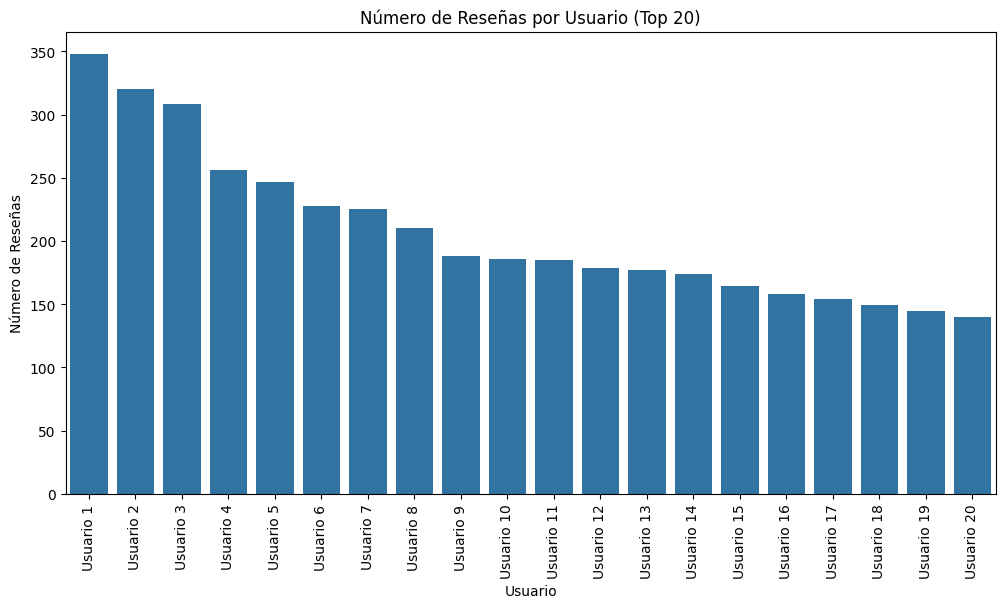

In [19]:
# Contar el número de reseñas por usuario y seleccionar los 20 principales
review_counts = df['user_id'].value_counts().head(20)

# Crear un gráfico de barras con etiquetas genéricas
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=review_counts.index, y=review_counts.values, order=review_counts.index)

# Configurar el gráfico
ax.set_title('Número de Reseñas por Usuario (Top 20)')
ax.set_xlabel('Usuario')
ax.set_ylabel('Número de Reseñas')

# Reemplazar los nombres de usuarios con etiquetas genéricas
ax.set_xticks(range(len(review_counts)))
ax.set_xticklabels([f'Usuario {i+1}' for i in range(len(review_counts))], rotation=90)

plt.show()

Distribución: Hay una clara tendencia decreciente de izquierda a derecha.
El usuario más activo (Usuario 1) tiene cerca de 350 reseñas.
El usuario menos activo de este top 20 (Usuario 20) tiene aproximadamente 140 reseñas.

Detalles notables: os primeros tres usuarios destacan por tener significativamente más reseñas que el resto.
Hay una caída más pronunciada entre el usuario 3 y 4.
A partir del usuario 4, la disminución en el número de reseñas es más gradual.

Comparaciones: El Usuario 1 tiene casi 2.5 veces más reseñas que el Usuario 20.
Los primeros 5 usuarios tienen más de 250 reseñas cada uno.
La mayoría de los usuarios en la segunda mitad del gráfico (11-20) tienen entre 150 y 200 reseñas.

Implicaciones: Este gráfico sugiere que hay un grupo pequeño de usuarios muy activos que contribuyen con un número desproporcionado de reseñas.
Incluso dentro del top 20, hay una diferencia significativa entre los usuarios más activos y los menos activos.

Esta distribución indica que una pequeña fracción de usuarios es responsable de una gran cantidad de reseñas en la plataforma. 

# Promedio de calificaciones por mes

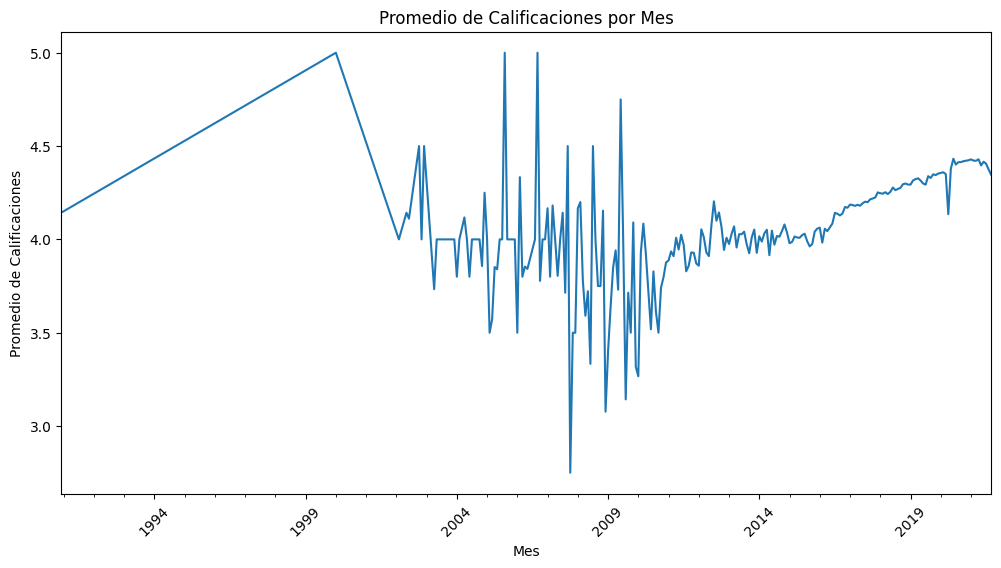

In [20]:
# Convertir el tiempo en formato de fecha
df['date'] = pd.to_datetime(df['time'], unit='ms')

# Extraer año y mes
df['year_month'] = df['date'].dt.to_period('M')

# Calcular el promedio de calificaciones por mes
monthly_ratings = df.groupby('year_month')['rating'].mean()

# Graficar
plt.figure(figsize=(12, 6))
monthly_ratings.plot(kind='line')
plt.title('Promedio de Calificaciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Calificaciones')
plt.xticks(rotation=45)
plt.show()

Hay una tendencia inicial al alza desde 1994 hasta alrededor de 1999.
Se observa una caída brusca alrededor de 1999-2000.
Después del 2000, hay una gran volatilidad en las calificaciones hasta aproximadamente 2010.
A partir de 2010, se aprecia una tendencia más estable y ligeramente ascendente.

El período entre 2000 y 2010 muestra la mayor variabilidad en las calificaciones.
Hay varios picos y valles extremos durante este período, con algunos alcanzando casi 5.0 y otros cayendo por debajo de 3.0.

Períodos específicos:
1994-1999: Aumento constante de las calificaciones promedio.
2000-2010: Alta volatilidad con fluctuaciones extremas.
2010-2019: Estabilización y ligero aumento gradual.

Se observan algunos puntos de datos muy bajos (cerca de 2.75) alrededor de 2008-2009.
Hay picos que alcanzan o superan 5.0 en varios puntos entre 2000 y 2010.

En los últimos años (2015-2019), se observa una tendencia ascendente más suave y constante.

Este gráfico sugiere que ha habido cambios significativos en cómo los usuarios han calificado a lo largo del tiempo. Los primeros años muestran una mejora constante, seguida de un período de gran inestabilidad, y finalmente una estabilización con una tendencia positiva en los años más recientes. Estos cambios podrían reflejar variaciones en la calidad del producto/servicio, cambios en la base de usuarios, o modificaciones en el sistema de calificación a lo largo del tiempo.

# Conclusión

La mayoría de las reseñas presentan calificaciones altas (mediana en 4.0 y una concentración en el rango 4-5). Esto indica una alta satisfacción general de los usuarios con los establecimientos en Nueva York. Sin embargo, también hay reseñas negativas (calificaciones de 1-2), lo que sugiere áreas de mejora para ciertos negocios.

Los términos prominentes en la nube de palabras, como "great", "food", "service", "friendly", "staff", "price", y "recommend", indican que los usuarios valoran altamente la calidad de la comida, el servicio al cliente, la amabilidad del personal y el precio. La presencia de términos como "highly recommend" y "coming back" también subraya la satisfacción general y la intención de los clientes de regresar.

La notable ausencia de palabras negativas prominentes sugiere que las críticas negativas no son tan frecuentes o significativas en comparación con las positivas. No obstante, palabras como "disorganized" y "bad" en las reseñas individuales señalan problemas específicos que ciertos establecimientos deben abordar.

La revisión muestra que una pequeña fracción de usuarios muy activos contribuye a una gran cantidad de reseñas. Esto puede sesgar las calificaciones generales, pero también puede indicar que estos usuarios encuentran valor en proporcionar retroalimentación regular.

La tendencia de las calificaciones ha mostrado variabilidad, con un período de alta volatilidad entre 2000 y 2010, seguido de una estabilización y una tendencia ligeramente ascendente a partir de 2010. Esta estabilización podría deberse a mejoras en los servicios y productos ofrecidos o a cambios en las expectativas y comportamientos de los usuarios.

Recomendaciones para nuestro cliente:

Dado que el servicio al cliente es un aspecto altamente valorado, debe asegurarse de capacitar adecuadamente a su personal para mantener una atención amigable y eficiente.
La preocupación por los precios sugiere aplicar fuertes estrategias de precios para asegurarse de que sean percibidos como justos y competitivos.
Para captar áreas de mejora, puede animar a los clientes a dejar reseñas y proporcionar comentarios.
Abordar las críticas negativas de manera constructiva puede mejorar la percepción del negocio y atraer a más clientes.